In [217]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [218]:
sales_data=pd.read_csv('Amazon Sales data.csv',parse_dates=['Order Date', 'Ship Date'])
sales_data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02


In [219]:
sales_data.shape

(100, 14)

In [220]:
sales_data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [221]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

In [222]:
sales_data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [223]:
sales_data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [224]:
sales_data['Item Type'].unique()

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

In [225]:
sales_data['Year'] = sales_data['Order Date'].dt.year
sales_data['Month'] = sales_data['Order Date'].dt.month
sales_data['Quarter'] = sales_data['Order Date'].dt.quarter
sales_data['Day'] = sales_data['Order Date'].dt.day

In [226]:
sales_data1=sales_data[['Region','Country','Item Type','Sales Channel','Order Priority',
                 'Order Date','Order ID','Ship Date','Units Sold','Unit Price',
                  'Unit Cost','Total Revenue','Total Cost','Total Profit',
                 'Year','Month','Quarter','Day']]

In [227]:
sales_data1

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Quarter,Day
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2,28
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,3,22
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2,2
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,2,20
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,2011,7,3,26
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,2011,11,4,11
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,2016,6,2,1
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,2015,7,3,30


In [228]:
sales_data1['Year'].value_counts()

2012    22
2014    15
2013    12
2011    12
2015    11
2010    10
2016    10
2017     8
Name: Year, dtype: int64

In [229]:
sales_data1['Month'].value_counts()

2     13
7     12
5     11
10    11
6     10
4      9
11     9
1      7
12     5
9      5
8      4
3      4
Name: Month, dtype: int64

In [230]:
sales_data1['Quarter'].value_counts()

2    30
4    25
1    24
3    21
Name: Quarter, dtype: int64

In [231]:
sort_data1=sales_data.sort_values(['Units Sold'],ascending=False)

In [232]:
Items_sold= sort_data1[['Region','Item Type','Year','Month','Quarter','Units Sold']]


In [233]:
Items_sold.head()

,Region,Item Type,Year,Month,Quarter,Units Sold
0,Australia and Oceania,Baby Food,2010,5,2,9925
56,Australia and Oceania,Clothes,2010,6,2,9905
74,Middle East and North Africa,Cosmetics,2013,7,3,9892
79,Australia and Oceania,Cosmetics,2013,7,3,9654
51,Sub-Saharan Africa,Fruits,2013,8,3,9606


In [234]:
sort_data2=sales_data.sort_values(['Total Revenue'],ascending=False)

In [235]:
Items_revenue= sort_data2[['Region','Item Type','Year','Month','Quarter','Units Sold','Total Revenue']]

In [236]:
Items_revenue.head()

,Region,Item Type,Year,Month,Quarter,Units Sold,Total Revenue
13,Central America and the Caribbean,Household,2017,2,1,8974,5997054.98
33,Asia,Household,2015,1,1,8250,5513227.50
68,Europe,Office Supplies,2010,10,4,8287,5396577.27
75,North America,Household,2014,11,4,6954,4647149.58
38,Asia,Office Supplies,2012,4,2,6708,4368316.68


In [237]:
sort_data3=sales_data.sort_values(['Total Profit'],ascending=False)

In [238]:
Items_profit= sort_data3[['Region','Item Type','Year','Month','Quarter','Units Sold','Total Revenue','Total Profit']]

In [239]:
Items_profit.head()

,Region,Item Type,Year,Month,Quarter,Units Sold,Total Revenue,Total Profit
74,Middle East and North Africa,Cosmetics,2013,7,3,9892,4324782.40,1719922.04
79,Australia and Oceania,Cosmetics,2013,7,3,9654,4220728.80,1678540.98
46,Europe,Cosmetics,2016,12,4,8867,3876652.40,1541705.29
30,Europe,Cosmetics,2012,9,3,8661,3786589.20,1505888.07
13,Central America and the Caribbean,Household,2017,2,1,8974,5997054.98,1487261.02


<AxesSubplot:>

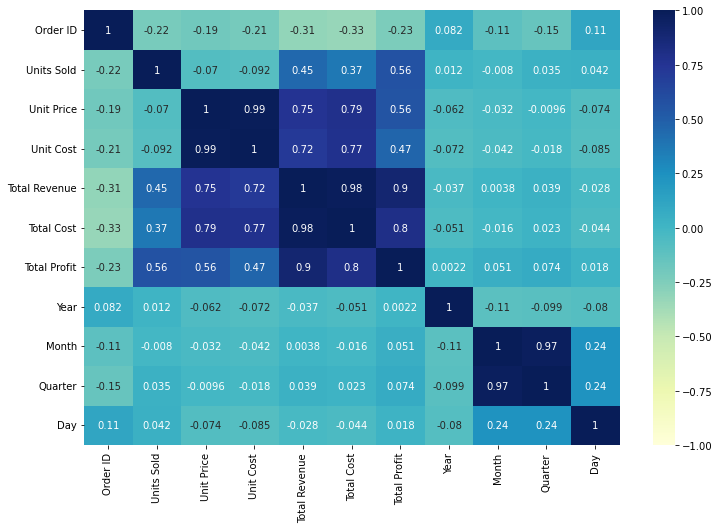

In [240]:
plt.figure(figsize=(12,8))
sns.heatmap(sales_data.corr(method='pearson'), annot=True, vmin=-1, vmax=1, cmap='YlGnBu')

In [241]:
SalesInsights = sales_data1.copy()
SalesInsights['Order Date'] = pd.to_datetime(sales_data1['Order Date']).dt.date

In [242]:
top10sales = SalesInsights.groupby('Order Date').sum().sort_values('Unit Price', ascending = False)
top10sales = top10sales.reset_index().head(10)

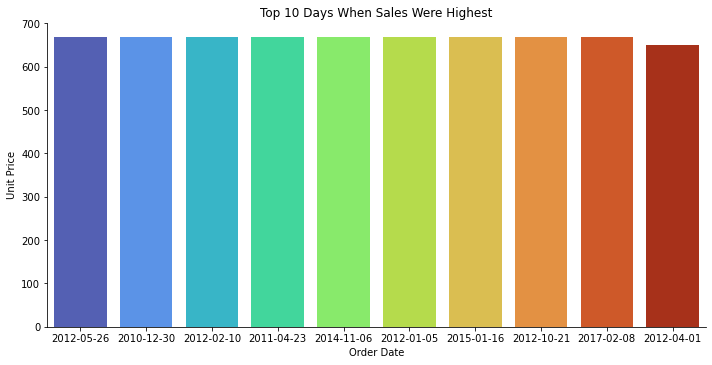

In [243]:
sns.catplot(y = 'Unit Price', x = 'Order Date', data = top10sales, aspect = 2,palette='turbo',kind="bar")
plt.title('Top 10 Days When Sales Were Highest')
top10sales[['Unit Price']]
plt.show()

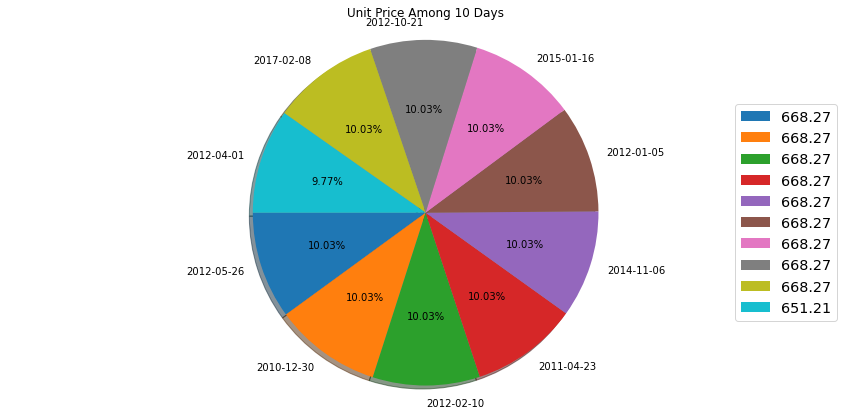

In [244]:
plt.figure(figsize=(15,7))
plt.pie('Unit Price',labels='Order Date',data = top10sales,
        autopct='%1.2f%%',shadow=True,startangle=180)
plt.axis('equal')
plt.title('Unit Price Among 10 Days')
plt.legend(round(top10sales['Unit Price'],2), loc=7, fontsize = 'x-large')
plt.show()

In [245]:
top10profits = SalesInsights.groupby('Order Date').sum().sort_values('Total Profit', ascending = False)
top10profits = top10profits.reset_index().head(10)

,Total Profit
0,1719922.04
1,1678540.98
2,1541705.29
3,1505888.07
4,1487261.02
5,1375311.70
6,1367272.50
7,1257775.58
8,1254472.05
9,1208744.24


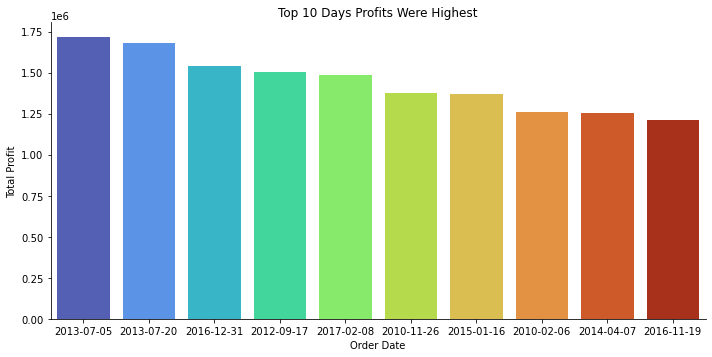

In [246]:
sns.catplot(y = 'Total Profit', x = 'Order Date', data = top10profits, aspect = 2,palette='turbo',kind="bar")
plt.title('Top 10 Days Profits Were Highest')
top10profits[['Total Profit']]

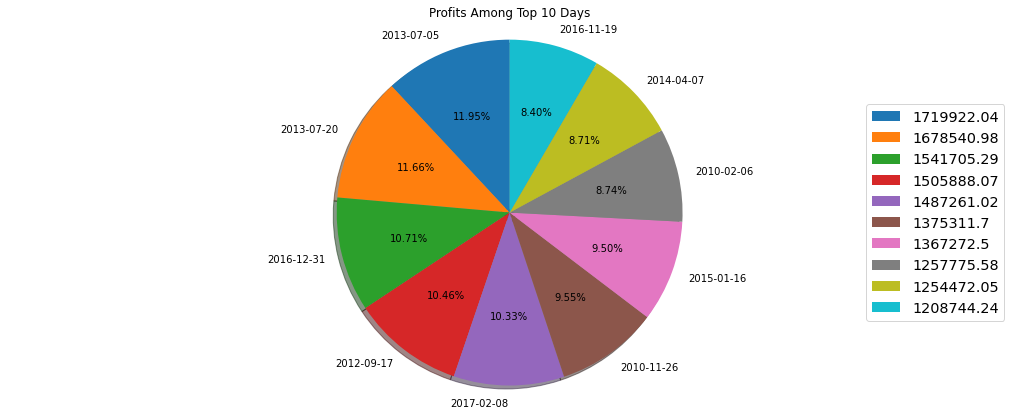

In [247]:
plt.figure(figsize=(18,7))
plt.pie('Total Profit',labels='Order Date',data = top10profits,
        autopct='%1.2f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title('Profits Among Top 10 Days')
plt.legend(round(top10profits['Total Profit'],2), loc=7, fontsize = 'x-large')
plt.show()

In [248]:
highqty = SalesInsights.groupby('Order Date').sum().sort_values('Units Sold', ascending = False)
highqty = highqty.reset_index().head(10)

,Units Sold
0,9925
1,9905
2,9892
3,9654
4,9606
5,9389
6,9379
7,8974
8,8867
9,8829


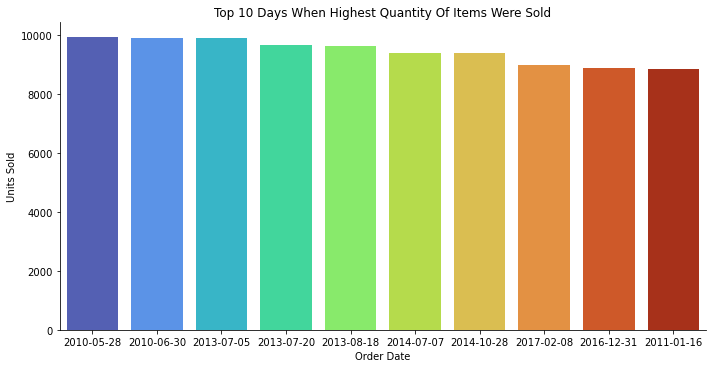

In [249]:
sns.catplot(y = 'Units Sold', x = 'Order Date', data = highqty, aspect = 2,palette='turbo',kind="bar")
plt.title('Top 10 Days When Highest Quantity Of Items Were Sold')
highqty[['Units Sold']]

In [250]:
MostCust = SalesInsights.groupby(['Order Date']).count().sort_values('Item Type', ascending = False)
MostCust = MostCust.reset_index().head(10)

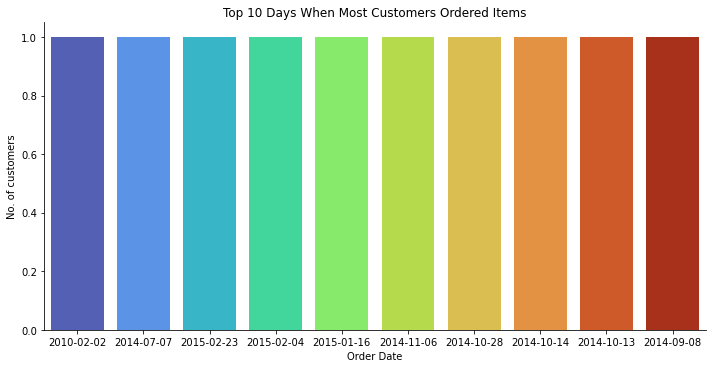

In [251]:
sns.catplot(y = 'Item Type', x = 'Order Date', data = MostCust, aspect = 2,palette='turbo',kind="bar")
plt.title('Top 10 Days When Most Customers Ordered Items')
plt.ylabel('No. of customers')
plt.show()

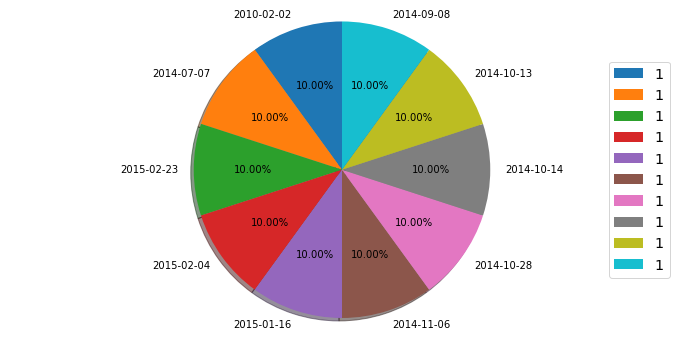

In [252]:
plt.figure(figsize=(12,6))
plt.pie(x = 'Item Type', labels = 'Order Date', data = MostCust,
        autopct='%1.2f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.legend(MostCust['Item Type'], loc=7, fontsize = 'x-large')
plt.show()

## Yearly Sales Record:

In [253]:
sales_data1.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Year',
       'Month', 'Quarter', 'Day'],
      dtype='object')

In [254]:
Yearly_Sales =  sales_data1[['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Year',
       'Month', 'Quarter']]

,Year,Unit Price
0,2010,2868.06
1,2011,2701.68
2,2012,7766.50
3,2013,3818.29
4,2014,2943.57
5,2015,2706.04
6,2016,2713.61
7,2017,2158.38


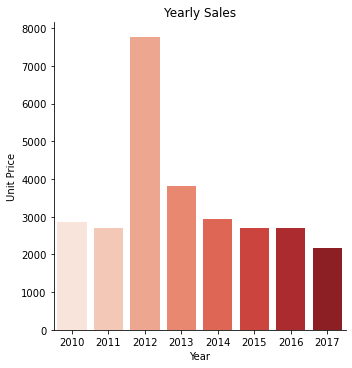

In [255]:
Yearly_Sales1 = Yearly_Sales.groupby('Year').sum().reset_index()
sns.catplot(y = 'Unit Price', x = 'Year', data = Yearly_Sales1, palette='Reds',kind="bar")
plt.xlabel('Year')
plt.ylabel('Unit Price')
plt.title('Yearly Sales')
Yearly_Sales1[['Year', 'Unit Price']]

<AxesSubplot:xlabel='Month', ylabel='Unit Price'>

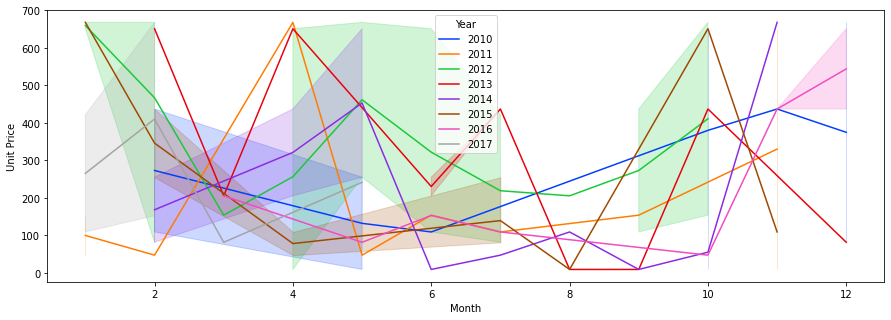

In [256]:
plt.figure(figsize = (15,5))
sns.lineplot(y ='Unit Price', x = 'Month',
             data= sales_data1.groupby(['Order Date','Year','Month']).sum(),
             hue = 'Year', palette='bright')

## Obseravtions:
From this plot, it is clear that Sales decreased continuously since 2013.

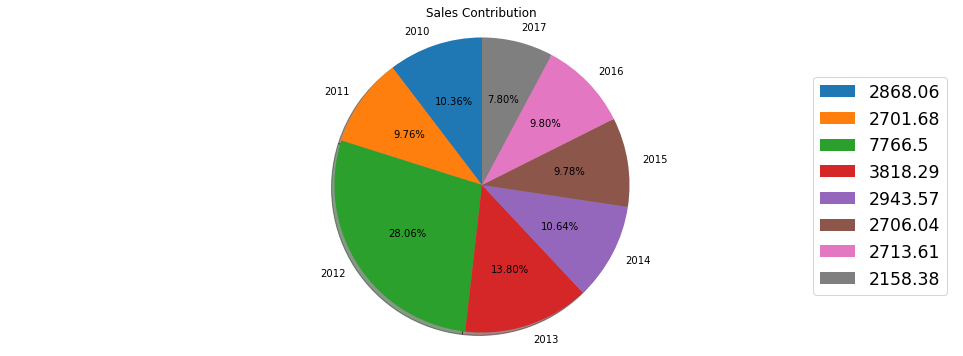

In [257]:
plt.figure(figsize=(17,6))
plt.pie('Unit Price',labels='Year',data=Yearly_Sales1,
        autopct='%1.2f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title('Sales Contribution')
plt.legend(round(Yearly_Sales1['Unit Price'],2), loc=7, fontsize = 'xx-large')
plt.show()

## Observations:
From 2010-17 Highest Sales Amount 2012>2013>2014>2010>2015>2011>2016>2017.

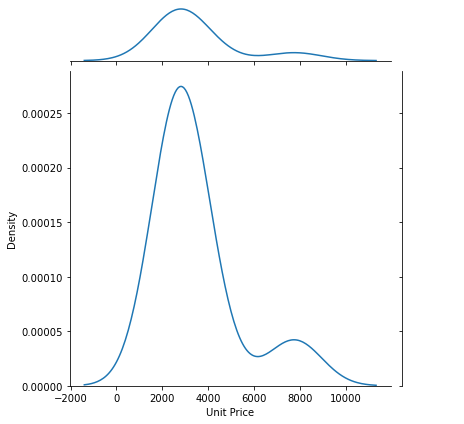

In [258]:
sns.jointplot(x='Unit Price',data=Yearly_Sales1,kind='kde')

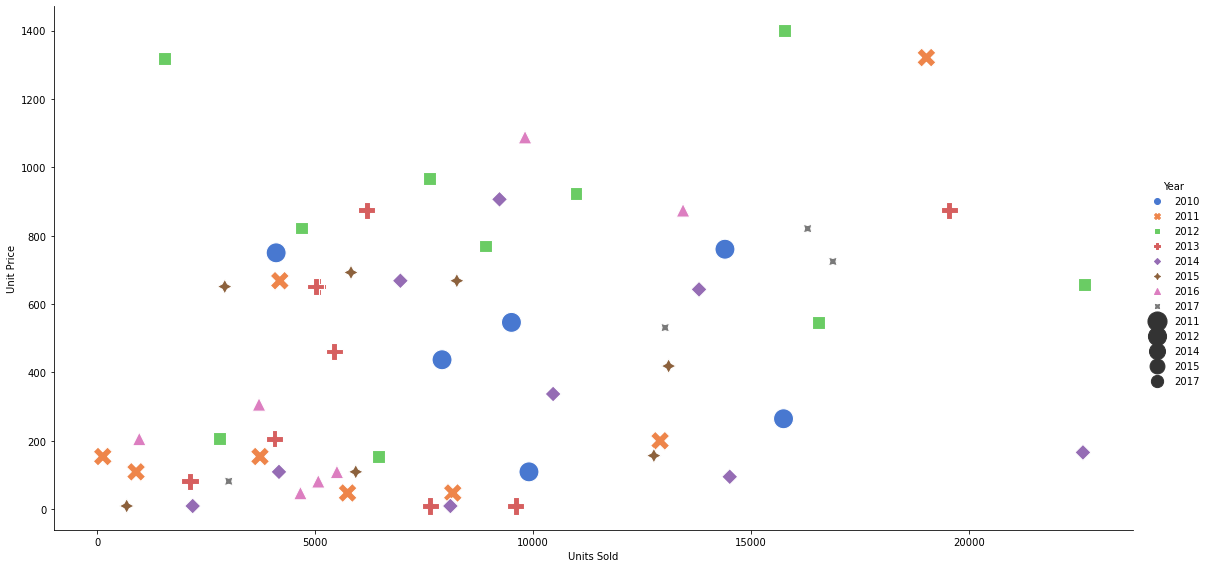

In [259]:
sns.relplot(x ='Units Sold',y = 'Unit Price',
            data=sales_data1.groupby(['Year','Month']).sum().reset_index(),
            hue='Year',height=8,aspect= 2, size='Year',palette='muted',
            style= 'Year', sizes = (400,150))

## Yearly-Monthwise Records:

In [260]:
Yearly_Monthwise_Sales = sales_data1.groupby(['Year','Month']).sum().reset_index()
Yearly_Monthwise_Sales.describe()

,Year,Month,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Quarter,Day
count,60.000000,60.000000,6.000000e+01,60.000000,60.000000,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,60.000000,60.000000
mean,2013.266667,6.283333,9.250340e+08,8547.850000,461.268833,318.413333,2.289146e+06,1.553009e+06,7.361366e+05,4.116667,27.500000
std,2.081937,3.334929,4.693931e+08,5619.058757,378.182720,288.416815,2.139470e+06,1.534718e+06,6.834586e+05,2.929058,15.609102
min,2010.000000,1.000000,1.154567e+08,124.000000,9.330000,6.920000,6.279090e+03,4.657160e+03,1.621930e+03,1.000000,1.000000
25%,2012.000000,3.750000,6.574517e+08,4182.250000,109.280000,56.670000,5.400720e+05,2.475922e+05,2.139680e+05,2.000000,17.750000
50%,2013.000000,6.000000,9.020511e+08,7628.500000,427.970000,268.045000,1.586264e+06,1.018850e+06,6.357950e+05,3.000000,25.000000
75%,2015.000000,9.000000,1.223585e+09,12943.000000,730.972500,525.385000,3.422559e+06,2.563514e+06,1.094270e+06,6.000000,33.250000
max,2017.000000,12.000000,2.190564e+09,22646.000000,1401.210000,1084.170000,8.545511e+06,5.223737e+06,3.398463e+06,16.000000,75.000000


******************************Yearly-Monthwise Sales Trend******************************


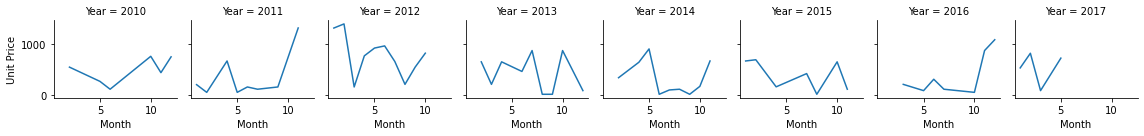

In [330]:
sns.relplot(x ='Month',y = 'Unit Price', data=Yearly_Monthwise_Sales,height=2,
            kind = 'line', aspect = 1, col = 'Year')
plt.xlabel('Month')
plt.ylabel('Unit Price')
print('*'*30+'Yearly-Monthwise Sales Trend'+'*'*30)

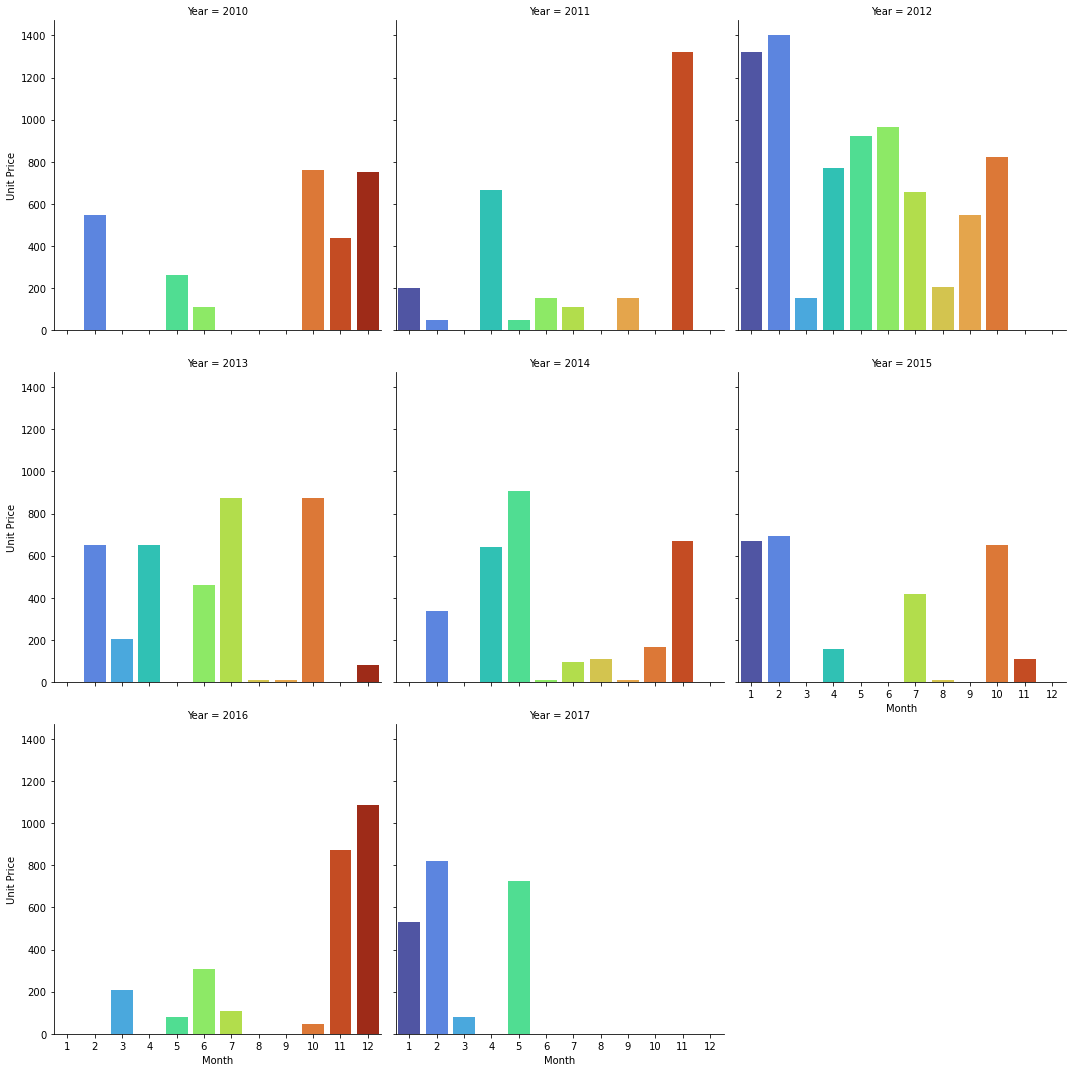

In [262]:
sns.catplot(y = 'Unit Price', x = 'Month', data = Yearly_Monthwise_Sales, palette='turbo',kind="bar",
            col='Year', col_wrap=3)

<AxesSubplot:xlabel='Unit Price', ylabel='Count'>

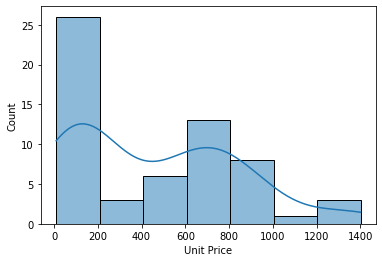

In [263]:
sns.histplot(Yearly_Monthwise_Sales['Unit Price'], kde = True)

## Monthly Records:

In [264]:
Monthly_sales = sales_data1.groupby(['Year','Month']).sum().reset_index()
Monthly_sales.describe()

,Year,Month,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Quarter,Day
count,60.000000,60.000000,6.000000e+01,60.000000,60.000000,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,60.000000,60.000000
mean,2013.266667,6.283333,9.250340e+08,8547.850000,461.268833,318.413333,2.289146e+06,1.553009e+06,7.361366e+05,4.116667,27.500000
std,2.081937,3.334929,4.693931e+08,5619.058757,378.182720,288.416815,2.139470e+06,1.534718e+06,6.834586e+05,2.929058,15.609102
min,2010.000000,1.000000,1.154567e+08,124.000000,9.330000,6.920000,6.279090e+03,4.657160e+03,1.621930e+03,1.000000,1.000000
25%,2012.000000,3.750000,6.574517e+08,4182.250000,109.280000,56.670000,5.400720e+05,2.475922e+05,2.139680e+05,2.000000,17.750000
50%,2013.000000,6.000000,9.020511e+08,7628.500000,427.970000,268.045000,1.586264e+06,1.018850e+06,6.357950e+05,3.000000,25.000000
75%,2015.000000,9.000000,1.223585e+09,12943.000000,730.972500,525.385000,3.422559e+06,2.563514e+06,1.094270e+06,6.000000,33.250000
max,2017.000000,12.000000,2.190564e+09,22646.000000,1401.210000,1084.170000,8.545511e+06,5.223737e+06,3.398463e+06,16.000000,75.000000


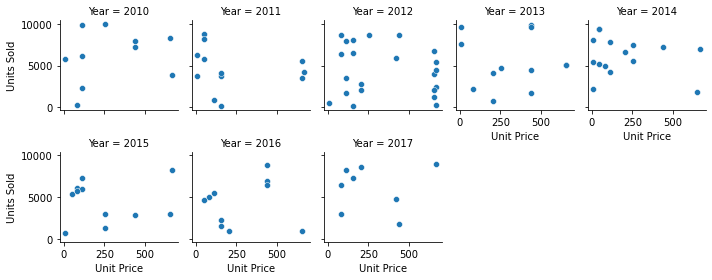

In [325]:
sns.relplot(y ='Units Sold',x = 'Unit Price', data=sales_data1,height = 2,aspect=1,
            col = 'Year',col_wrap=5, palette='muted')
plt.show()

******************************Monthly Sales Trend in 2010******************************


<Figure size 576x1440 with 0 Axes>

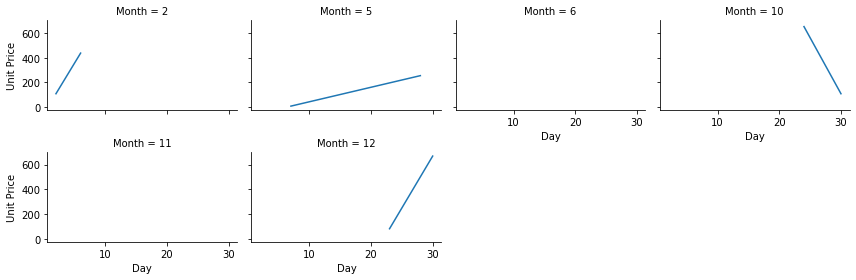

In [331]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Day',y = 'Unit Price', data= sales_data1.query('Year == 2010'),
            kind = 'line', col = 'Month', col_wrap =4, height = 2, aspect = 1.5)
plt.ylabel('Unit Price')
print('*'*30+'Monthly Sales Trend in 2010'+'*'*30)

******************************Monthly Sales Trend in 2011******************************


<Figure size 576x1440 with 0 Axes>

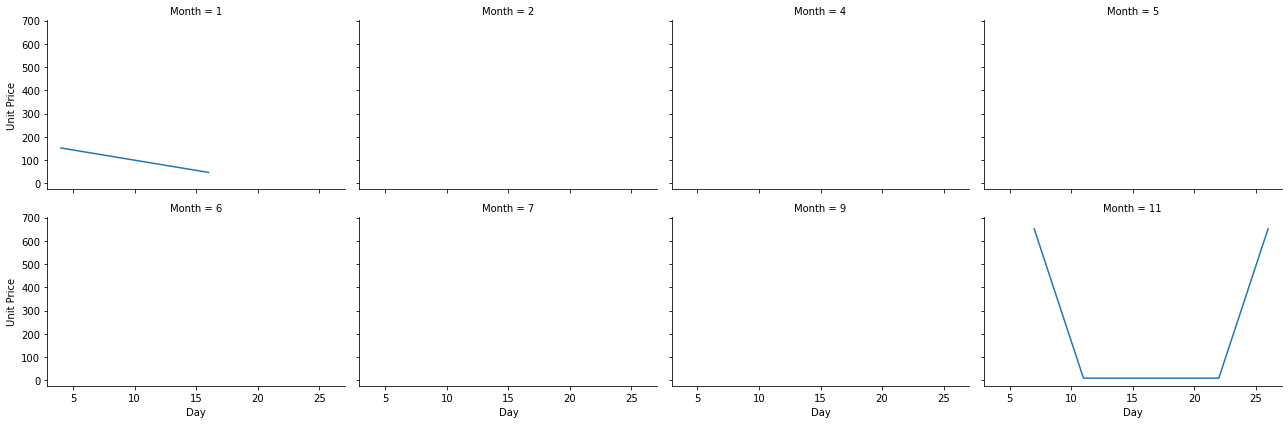

In [332]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Day',y = 'Unit Price', data= sales_data1.query('Year == 2011'),
            kind = 'line', col = 'Month', col_wrap =4, height = 3, aspect = 1.5)
plt.ylabel('Unit Price')
print('*'*30+'Monthly Sales Trend in 2011'+'*'*30)

******************************Monthly Sales Trend in 2012******************************


<Figure size 576x1440 with 0 Axes>

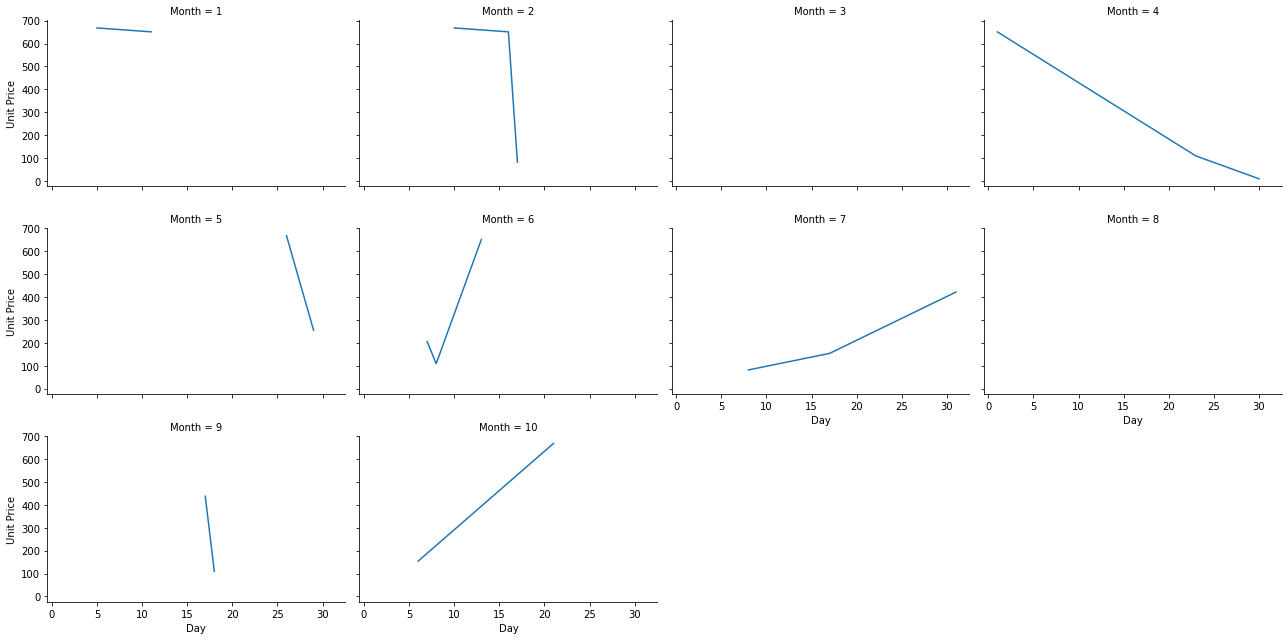

In [288]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Day',y = 'Unit Price', data= sales_data1.query('Year == 2012'),
            kind = 'line', col = 'Month', col_wrap =4, height = 3, aspect = 1.5)
plt.ylabel('Unit Price')
print('*'*30+'Monthly Sales Trend in 2012'+'*'*30)

******************************Monthly Sales Trend in 2013******************************


<Figure size 576x1440 with 0 Axes>

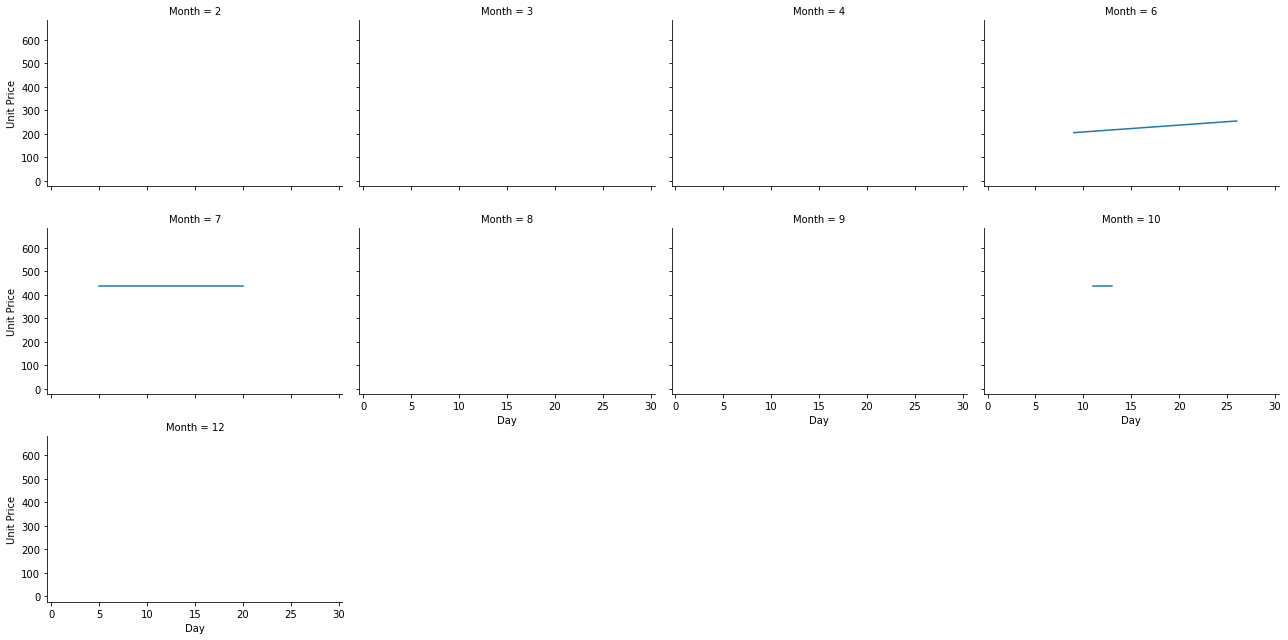

In [287]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Day',y = 'Unit Price', data= sales_data1.query('Year == 2013'),
            kind = 'line', col = 'Month', col_wrap =4, height = 3, aspect = 1.5)
plt.ylabel('Unit Price')
print('*'*30+'Monthly Sales Trend in 2013'+'*'*30)

******************************Monthly Sales Trend in 2014******************************


<Figure size 576x1440 with 0 Axes>

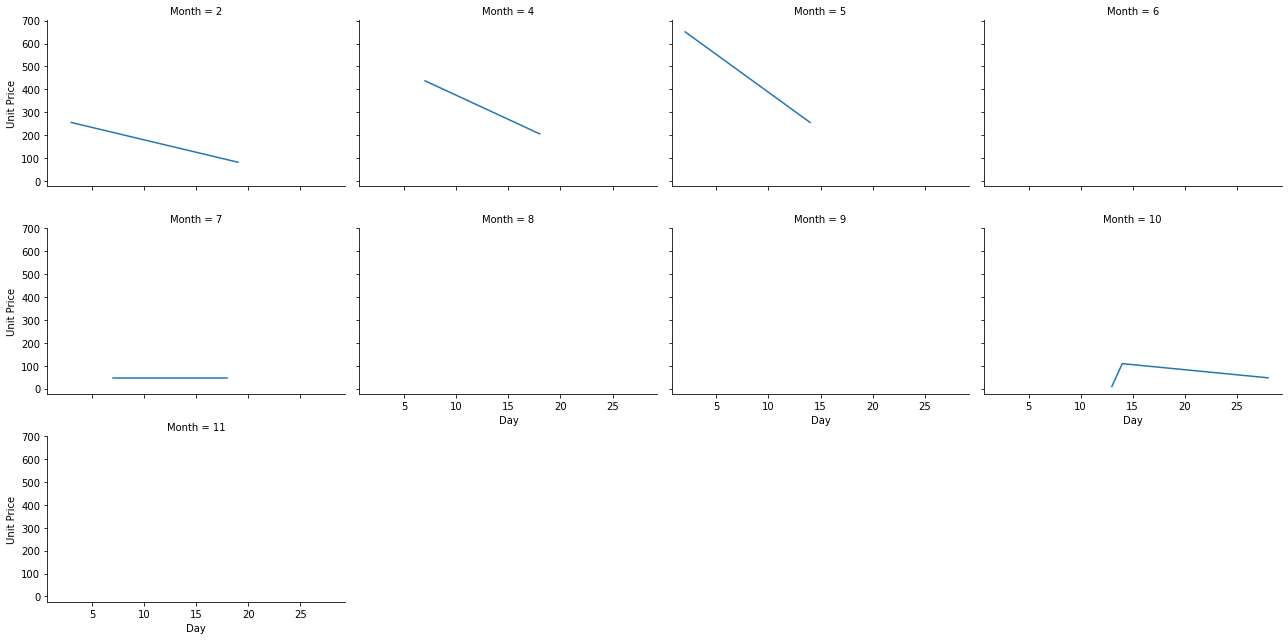

In [286]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Day',y = 'Unit Price', data= sales_data1.query('Year == 2014'),
            kind = 'line', col = 'Month', col_wrap =4, height = 3, aspect = 1.5)
plt.ylabel('Unit Price')
print('*'*30+'Monthly Sales Trend in 2014'+'*'*30)

******************************Monthly Sales Trend in 2015******************************


<Figure size 576x1440 with 0 Axes>

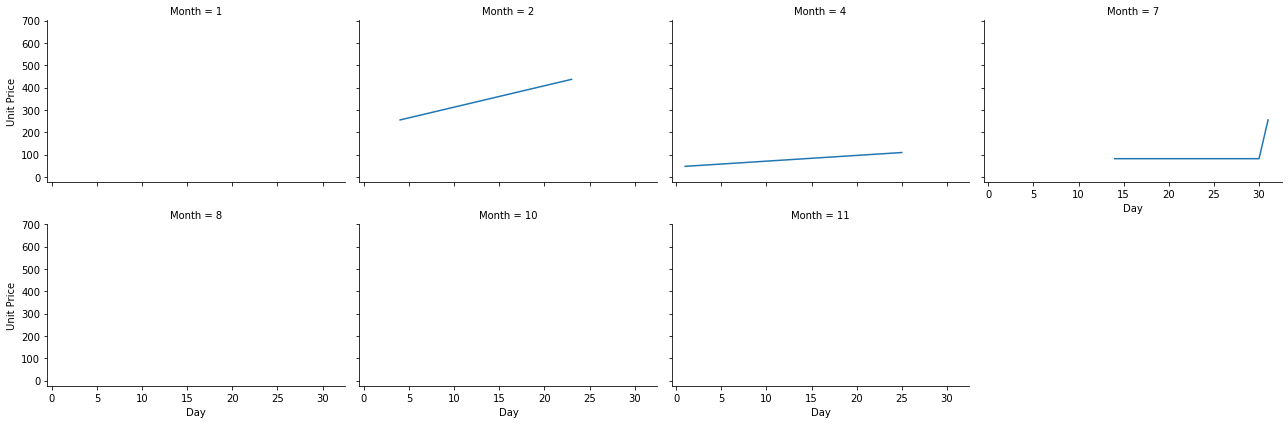

In [285]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Day',y = 'Unit Price', data= sales_data1.query('Year == 2015'),
            kind = 'line', col = 'Month', col_wrap =4, height = 3, aspect = 1.5)
plt.ylabel('Unit Price')
print('*'*30+'Monthly Sales Trend in 2015'+'*'*30)

******************************Monthly Sales Trend in 2016******************************


<Figure size 576x1440 with 0 Axes>

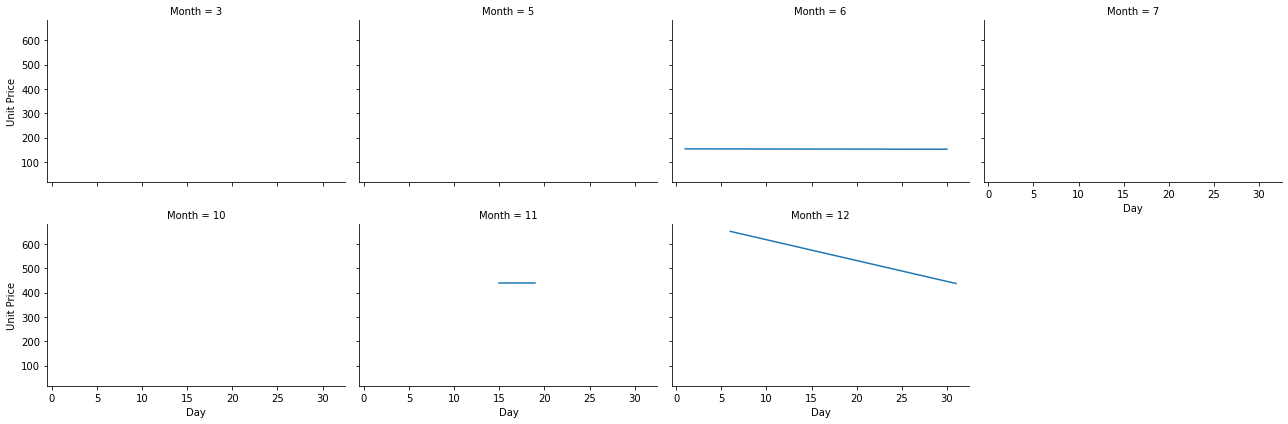

In [272]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Day',y = 'Unit Price', data= sales_data1.query('Year == 2016'),
            kind = 'line', col = 'Month', col_wrap =4, height = 3, aspect = 1.5)
plt.ylabel('Unit Price')
print('*'*30+'Monthly Sales Trend in 2016'+'*'*30)

**************************************************Monthly Sales Trend in 2017**************************************************


<Figure size 576x1440 with 0 Axes>

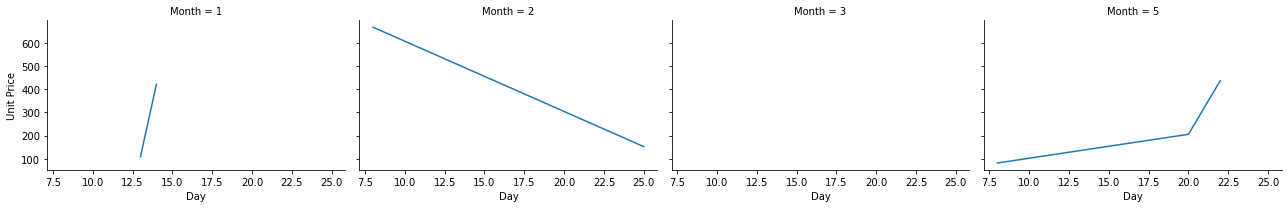

In [284]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Day',y = 'Unit Price', data= sales_data1.query('Year == 2017'),
            kind = 'line', col = 'Month', col_wrap =4, height = 3, aspect = 1.5)
plt.ylabel('Unit Price')
print('*'*30+'Monthly Sales Trend in 2017'+'*'*30)

## Yearly Profit Records

,Year,Total Profit
0,2010,6629567.43
1,2011,2741008.23
2,2012,9213010.12
3,2013,6715420.04
4,2014,5879461.68
5,2015,3996539.44
6,2016,4903838.01
7,2017,4089353.45


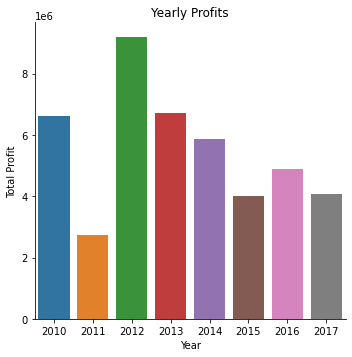

In [295]:
sns.catplot(y = 'Total Profit', x = 'Year', data = Yearly_Sales1,kind="bar")
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Yearly Profits')
Yearly_Sales1[['Year', 'Total Profit']]

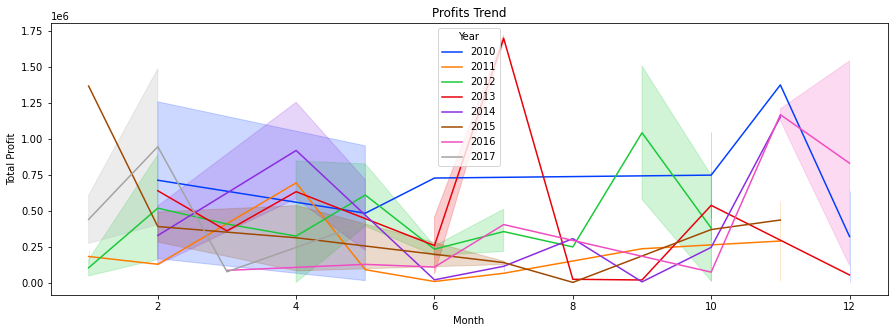

In [296]:
plt.figure(figsize = (15,5))
sns.lineplot(y ='Total Profit', x = 'Month',
             data= sales_data1.groupby(['Order Date','Year','Month']).sum(),
             hue = 'Year', palette='bright')
plt.title('Profits Trend')
plt.show()

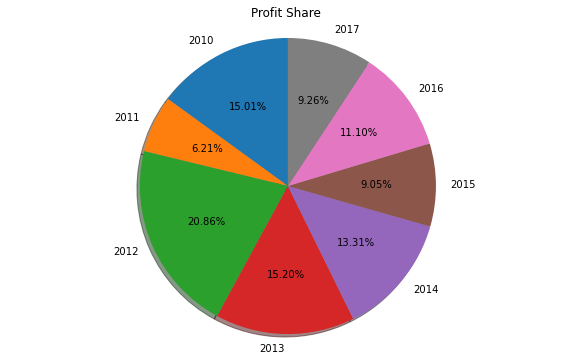

In [300]:
plt.figure(figsize=(10,6))
plt.pie('Total Profit',labels='Year',data=Yearly_Sales1[['Year', 'Total Profit']],
        autopct='%1.2f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title('Profit Share')
plt.show()

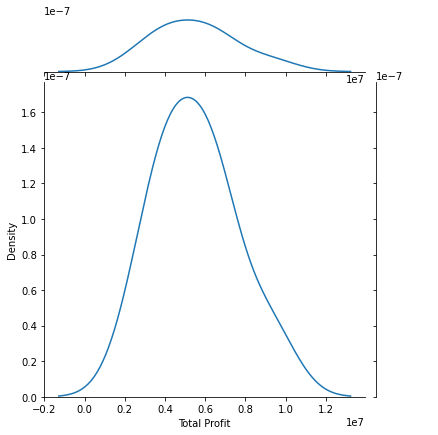

In [302]:
sns.jointplot(x='Total Profit',data=Yearly_Sales1,kind='kde')

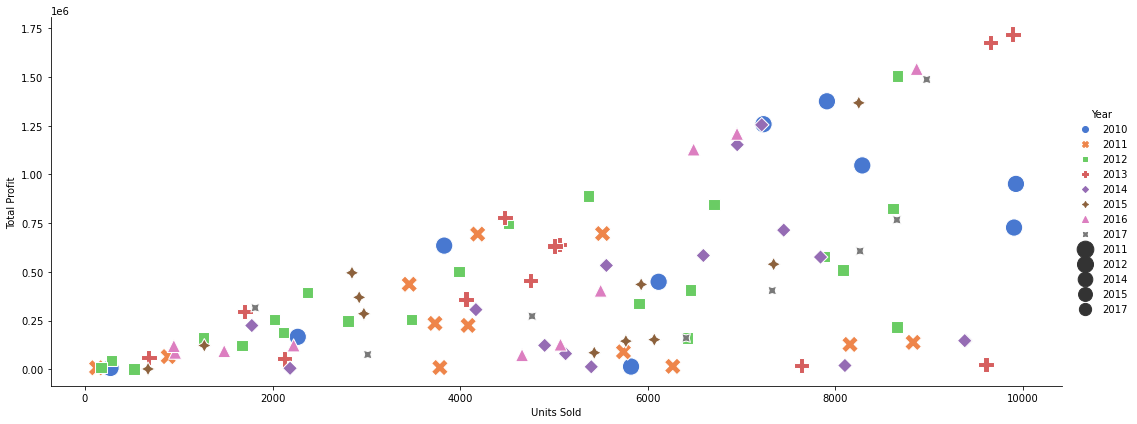

In [304]:
sns.relplot(x ='Units Sold',y = 'Total Profit',
            data=sales_data1.groupby(['Year','Month','Day']).sum().reset_index(),
            hue='Year',height=6,aspect=2.5, size='Year',palette='muted',
            style= 'Year', sizes = (300,150))

## Observations:
In the scatterplot above, you can see that Sales Margin is mostly between $ 1 and $ 10000.

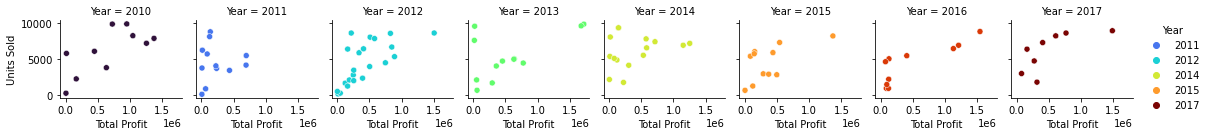

In [310]:
sns.relplot(y ='Units Sold',x = 'Total Profit', data=sales_data1, hue='Year', col = 'Year',height=2,
            palette='turbo')

## Yearly Month wise Records:

******************************Yearly-Month wise Sales Margin Trend******************************


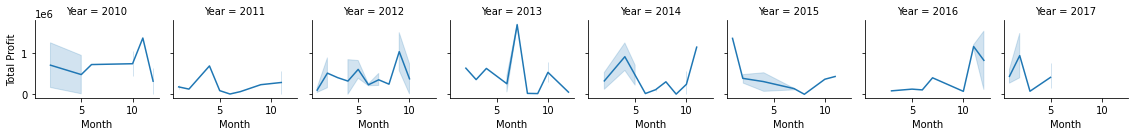

In [312]:
sns.relplot(x ='Month',y = 'Total Profit', data= sales_data1 ,height=2,
            kind = 'line', aspect = 1, col = 'Year')
plt.ylabel('Total Profit')
print('*'*30+'Yearly-Month wise Sales Margin Trend'+'*'*30)

******************************Yearly-Month-wise Total Profit Trend******************************


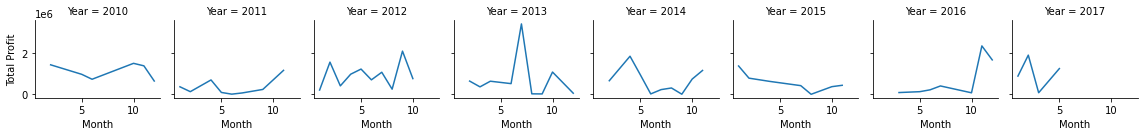

In [321]:
sns.relplot(x ='Month',y = 'Total Profit', data=Yearly_Monthwise_Sales,height=2,
            kind = 'line', aspect = 1, col = 'Year')
plt.xlabel('Month')
plt.ylabel('Total profit')
print('*'*30+'Yearly-Month-wise Total Profit Trend'+'*'*30)

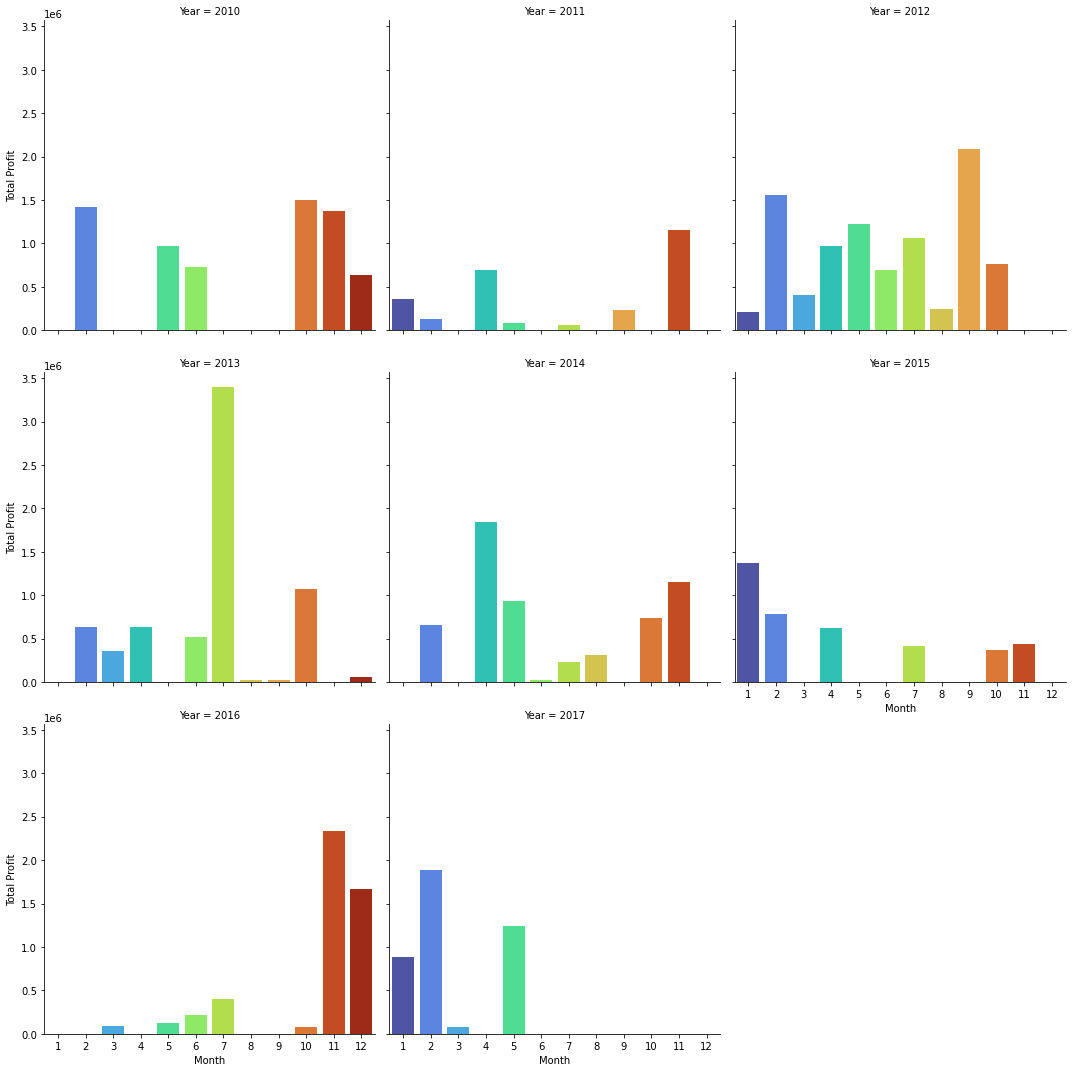

In [315]:
sns.catplot(y = 'Total Profit', x = 'Month', data = Yearly_Monthwise_Sales, palette='turbo',kind="bar",
            col='Year', col_wrap=3)

<AxesSubplot:xlabel='Total Profit', ylabel='Count'>

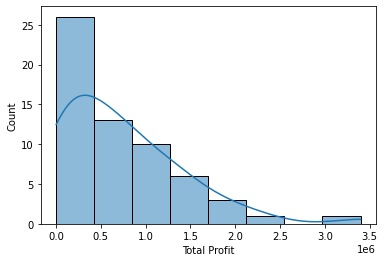

In [316]:
sns.histplot(Yearly_Monthwise_Sales['Total Profit'], kde = True)

## Monthly Records

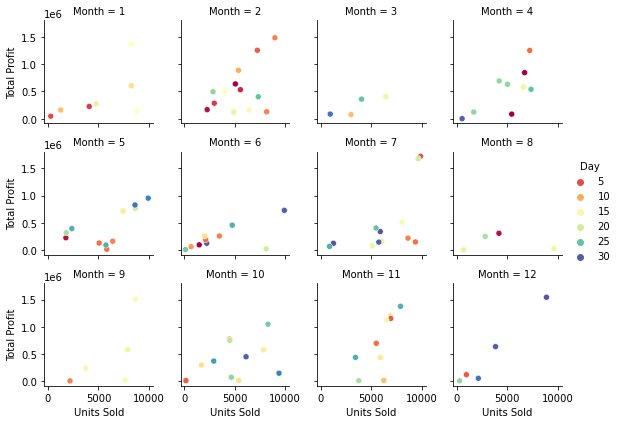

In [318]:
sns.relplot(x = 'Units Sold',
            y = 'Total Profit', data=sales_data1, height = 2,aspect=1,
            hue='Day', col = 'Month',col_wrap = 4, palette='Spectral')

****************************************Monthly Total Profit Trend ****************************************


<Figure size 576x1440 with 0 Axes>

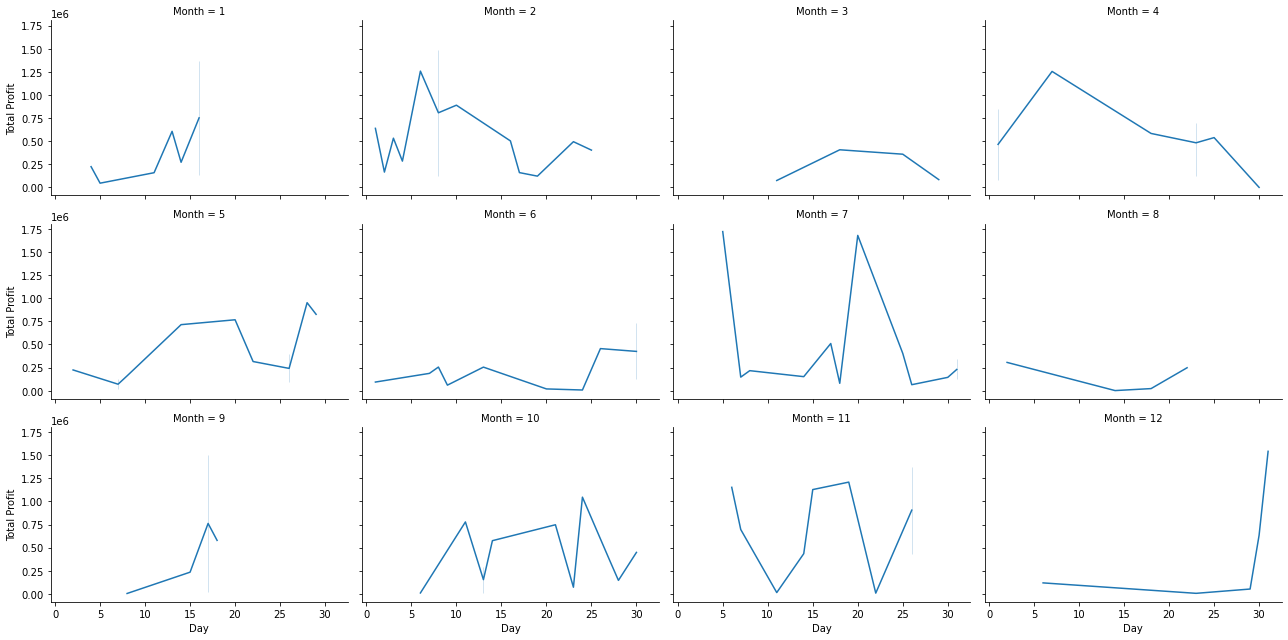

In [322]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Day',y = 'Total Profit', data= sales_data1,
            kind = 'line', col = 'Month', col_wrap =4, height = 3, aspect = 1.5)
plt.ylabel('Unit Sold')
print('*'*40+'Monthly Total Profit Trend '+'*'*40)